In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
from sympy import init_printing; init_printing(use_latex='mathjax')
import pyomo_utilities

In [12]:
data_file = 'Emisiones_mexico.csv'
data = pd.read_csv(data_file, header = None)

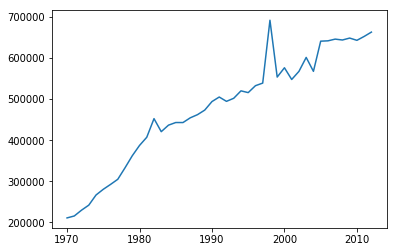

In [13]:
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

plt.figure()
plt.plot(x,y)
plt.show()

In [51]:
beta = pyomo_utilities.curve_polyfit(x, y, 25)
yhat = beta.dot(np.array([x**i for i in range(26)]))

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 26
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 7.970801115036011
# -------------------------------------

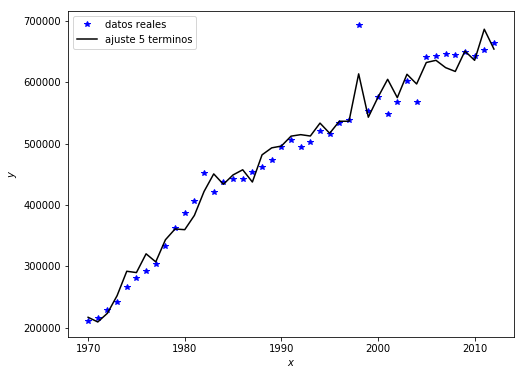

In [52]:
plt.figure(figsize = (8,6))
plt.plot(x, y, '*b', label = 'datos reales')
plt.plot(x, yhat, '-k', label = 'ajuste 5 terminos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [53]:
beta20_ridge = pyomo_utilities.curve_polyfit(x, y, 25, reg_mode = 'ridge', reg_coef = 0.1)
yhat20_ridge = np.array([x**i for i in range(26)]).T.dot(beta20_ridge)

WARNING - Loading a SolverResults object with a warning status into model=unknown; message from solver=Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 26
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.11.1\x3a Maximum Number of Iterations Exceeded.
  Termination condition: maxIterations
  Id: 400
  Error rc: 0
  Time: 4.82114052772522
# --------------------------------------

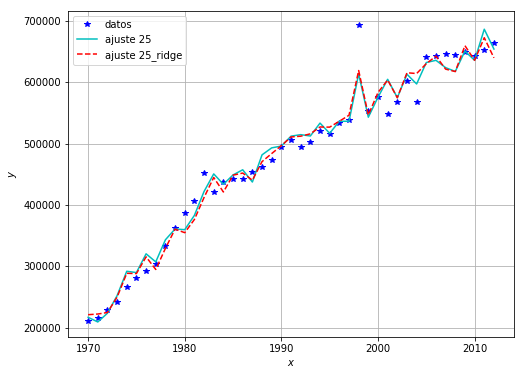

In [54]:
plt.figure(figsize=(8,6))
plt.plot(x, y, '*b', label = 'datos')
plt.plot(x, yhat, '-c', label = 'ajuste 25')
plt.plot(x, yhat20_ridge, '--r', label = 'ajuste 25_ridge')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()